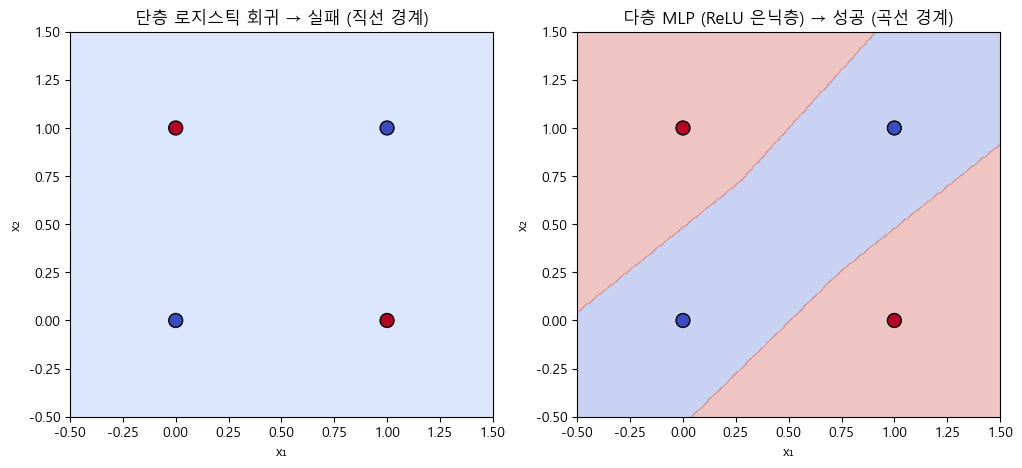

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정 (그래프 제목용)
# -------------------------------
# Windows 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux 사용자 (나눔고딕 설치 필요)
# plt.rcParams['font.family'] = 'NanumGothic'

# 폰트 변경 후 마이너스('-') 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------


# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])    # XOR 결과

# -------------------------------
# ① Softmax 회귀 (단층) -> LogisticRegression (단층)
# -------------------------------
# 'multi_class' 옵션을 제거하여 FutureWarning를 해결합니다.
# 이진 분류(y=0 or 1)이므로 기본값으로 두는 것이 올바릅니다.
softmax_clf = LogisticRegression(max_iter=1000) # <--- 수정됨
softmax_clf.fit(X, y)

# -------------------------------
# ② 다층 MLP (은닉층 2개 + ReLU)
# -------------------------------
mlp_clf = MLPClassifier(hidden_layer_sizes=(8, 8),
                         activation='relu',
                         max_iter=5000,
                         random_state=1)
mlp_clf.fit(X, y)

# -------------------------------
# 시각화용 격자(grid)
# -------------------------------
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                       np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = softmax_clf.predict(grid).reshape(xx.shape)
Z2 = mlp_clf.predict(grid).reshape(xx.shape)

# -------------------------------
# 시각화
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# (1) 로지스틱 회귀 (단층)
axs[0].contourf(xx, yy, Z1, alpha=0.3, cmap='coolwarm')
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[0].set_title("단층 로지스틱 회귀 → 실패 (직선 경계)") # <--- 제목 수정 (의미 명확화)

# (2) 다층 MLP
axs[1].contourf(xx, yy, Z2, alpha=0.3, cmap='coolwarm')
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[1].set_title("다층 MLP (ReLU 은닉층) → 성공 (곡선 경계)")

for ax in axs:
     ax.set_xlabel("x₁")
     ax.set_ylabel("x₂")
     ax.set_xlim(-0.5, 1.5)
     ax.set_ylim(-0.5, 1.5)

plt.show()

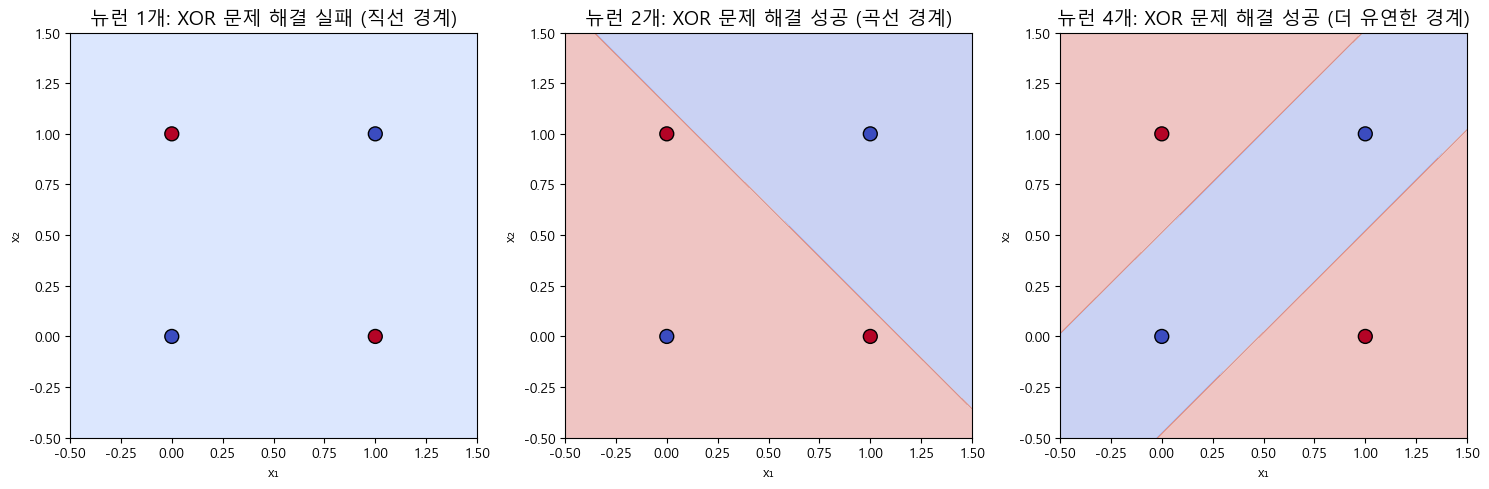

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import warnings

# -------------------------------
# 한글 폰트 설정 (그래프 제목용)
# -------------------------------
try:
    plt.rcParams['font.family'] = 'Malgun Gothic'
except:
    try:
        plt.rcParams['font.family'] = 'AppleGothic'
    except:
        try:
            plt.rcParams['font.family'] = 'NanumGothic'
        except:
            pass

plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])    # XOR 결과

# -------------------------------
# 1. MLP 모델 정의 및 학습 (은닉층 1개 고정)
# -> random_state=2로 변경하여 학습 성공을 유도
# -------------------------------

# A. 뉴런 1개 모델 (실패)
mlp_1n = MLPClassifier(hidden_layer_sizes=(1,),
                      activation='relu',
                      max_iter=5000,
                      random_state=2) # <--- random_state=2로 변경
mlp_1n.fit(X, y)

# B. 뉴런 2개 모델 (최소 성공 조건)
mlp_2n = MLPClassifier(hidden_layer_sizes=(2,),
                      activation='relu',
                      max_iter=5000,
                      random_state=10) # <--- random_state=2로 변경
mlp_2n.fit(X, y)

# C. 뉴런 4개 모델 (여유 있는 성공 조건)
mlp_4n = MLPClassifier(hidden_layer_sizes=(4,),
                      activation='relu',
                      max_iter=5000,
                      random_state=1) # <--- random_state=2로 변경
mlp_4n.fit(X, y)


# -------------------------------
# 시각화용 격자(grid) 및 예측 결과 계산
# -------------------------------
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                      np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = mlp_1n.predict(grid).reshape(xx.shape)
Z2 = mlp_2n.predict(grid).reshape(xx.shape)
Z3 = mlp_4n.predict(grid).reshape(xx.shape)

# -------------------------------
# 시각화 (1x3 서브플롯)
# -------------------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# (1) 뉴런 1개
axs[0].contourf(xx, yy, Z1, alpha=0.3, cmap='coolwarm')
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[0].set_title("뉴런 1개: XOR 문제 해결 실패 (직선 경계)", fontsize=14)

# (2) 뉴런 2개
axs[1].contourf(xx, yy, Z2, alpha=0.3, cmap='coolwarm')
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[1].set_title("뉴런 2개: XOR 문제 해결 성공 (곡선 경계)", fontsize=14)

# (3) 뉴런 4개
axs[2].contourf(xx, yy, Z3, alpha=0.3, cmap='coolwarm')
axs[2].scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
axs[2].set_title("뉴런 4개: XOR 문제 해결 성공 (더 유연한 경계)", fontsize=14)

for ax in axs:
     ax.set_xlabel("x₁")
     ax.set_ylabel("x₂")
     ax.set_xlim(-0.5, 1.5)
     ax.set_ylim(-0.5, 1.5)

plt.tight_layout()
plt.show()


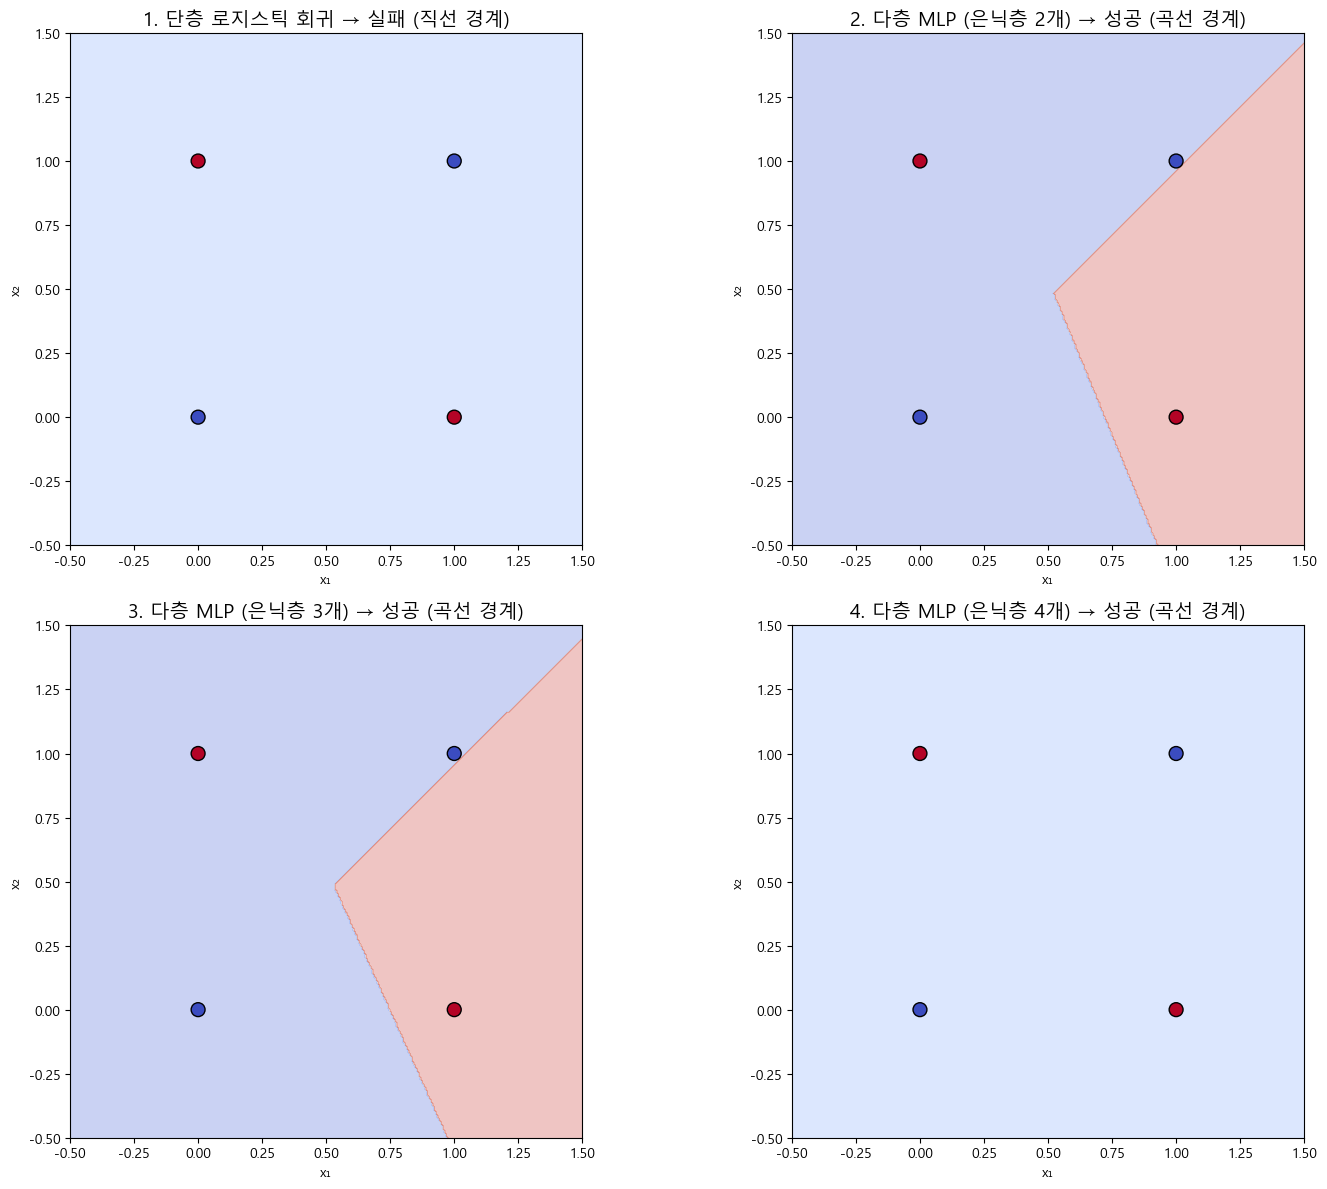

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정 (그래프 제목용)
# -------------------------------
# Windows 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux 사용자 (나눔고딕 설치 필요)
# plt.rcParams['font.family'] = 'NanumGothic'

# 폰트 변경 후 마이너스('-') 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------


# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])     # XOR 결과

# ------------------------------------------------
# 모델 정의 및 학습
# ------------------------------------------------

# 1. 단층 로지스틱 회귀 (Logistic Regression - Linear/Single Layer)
# multi_class 옵션을 제거하여 FutureWarning를 해결하고 기본 이진 분류를 사용
softmax_clf = LogisticRegression(max_iter=1000, random_state=1)
softmax_clf.fit(X, y)

# 2. 다층 MLP (은닉층 2개)
mlp_clf_2layer = MLPClassifier(hidden_layer_sizes=(4, 4), # 8개의 노드를 가진 은닉층 2개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_2layer.fit(X, y)

# 3. 다층 MLP (은닉층 3개)
mlp_clf_3layer = MLPClassifier(hidden_layer_sizes=(4, 4, 4), # 8개의 노드를 가진 은닉층 3개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_3layer.fit(X, y)

# 4. 다층 MLP (은닉층 4개)
mlp_clf_4layer = MLPClassifier(hidden_layer_sizes=(4, 4, 4, 4), # 8개의 노드를 가진 은닉층 4개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_4layer.fit(X, y)


# -------------------------------
# 시각화용 격자(grid) 및 예측값 계산
# -------------------------------
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                       np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = softmax_clf.predict(grid).reshape(xx.shape)       # 로지스틱 회귀 (단층)
Z2 = mlp_clf_2layer.predict(grid).reshape(xx.shape)    # MLP (2층)
Z3 = mlp_clf_3layer.predict(grid).reshape(xx.shape)    # MLP (3층)
Z4 = mlp_clf_4layer.predict(grid).reshape(xx.shape)    # MLP (4층)

# -------------------------------
# 2x2 서브플롯을 이용한 시각화
# -------------------------------
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.ravel() # 서브플롯을 1차원 배열로 평탄화하여 반복문 사용 용이하게 함

# 모델 리스트와 제목
models_z = [Z1, Z2, Z3, Z4]
titles = [
    "1. 단층 로지스틱 회귀 → 실패 (직선 경계)",
    "2. 다층 MLP (은닉층 2개) → 성공 (곡선 경계)",
    "3. 다층 MLP (은닉층 3개) → 성공 (곡선 경계)",
    "4. 다층 MLP (은닉층 4개) → 성공 (곡선 경계)"
]

# 모든 서브플롯에 동일하게 시각화 요소 적용
for i, ax in enumerate(axs):
    ax.contourf(xx, yy, models_z[i], alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_aspect('equal', adjustable='box') # 정사각형 모양 유지

plt.tight_layout() # 서브플롯 간 간격 자동 조정
plt.show()


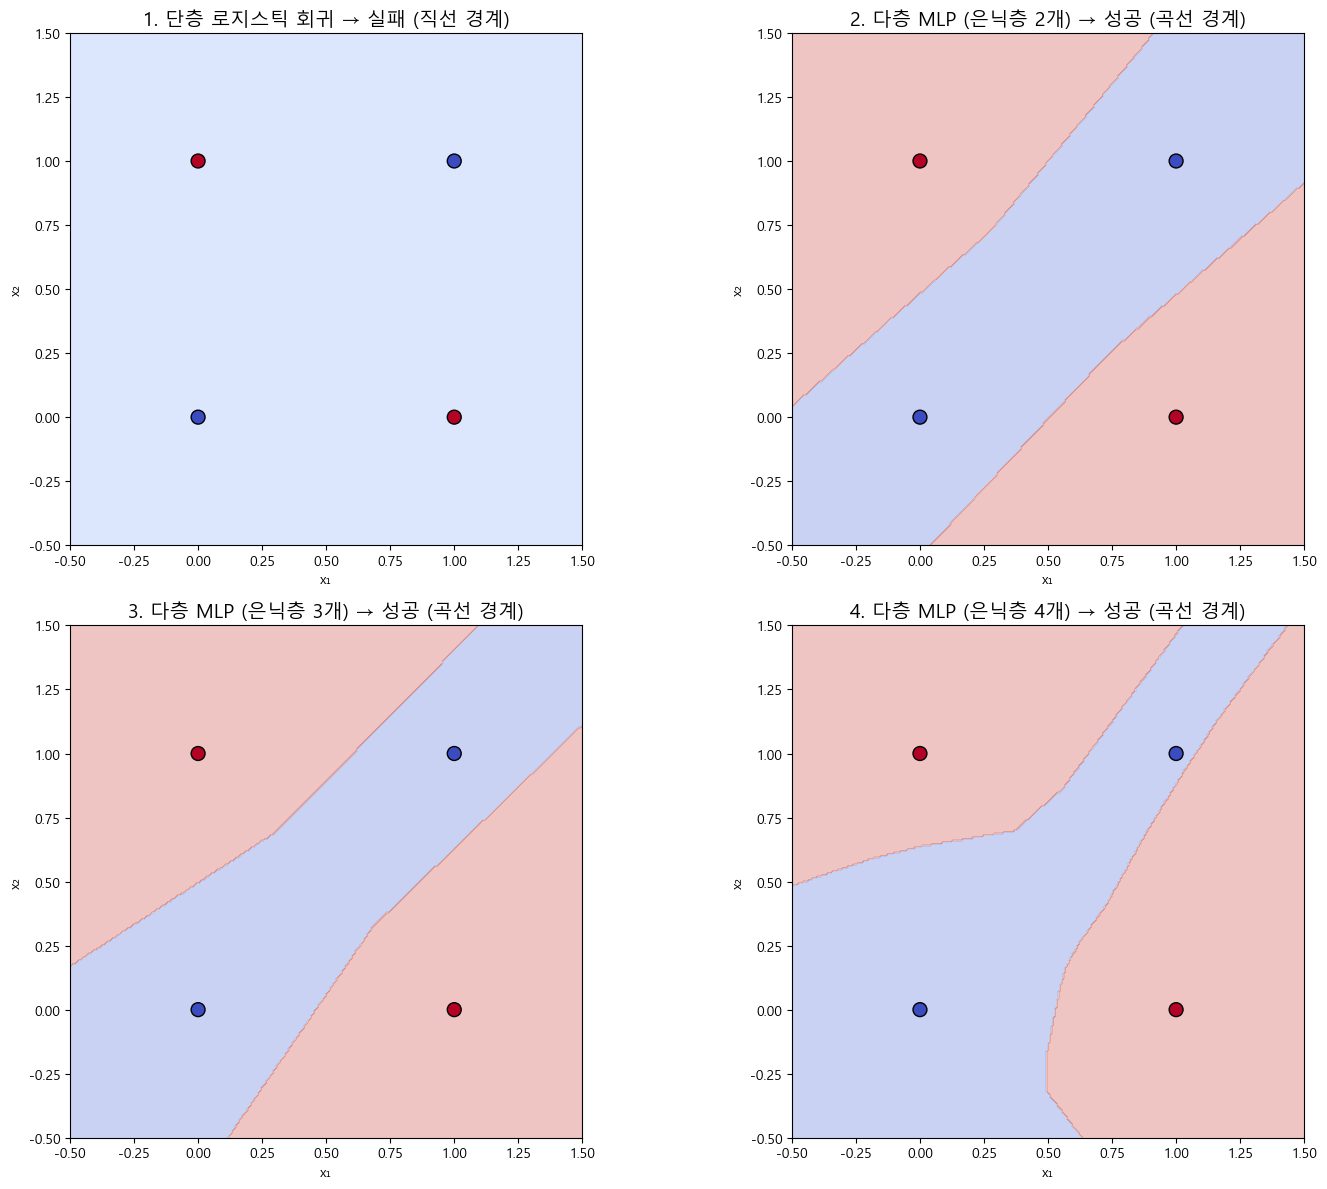

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정 (그래프 제목용)
# -------------------------------
# Windows 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux 사용자 (나눔고딕 설치 필요)
# plt.rcParams['font.family'] = 'NanumGothic'

# 폰트 변경 후 마이너스('-') 기호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------


# XOR 데이터 생성
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])     # XOR 결과

# ------------------------------------------------
# 모델 정의 및 학습
# ------------------------------------------------

# 1. 단층 로지스틱 회귀 (Logistic Regression - Linear/Single Layer)
# multi_class 옵션을 제거하여 FutureWarning를 해결하고 기본 이진 분류를 사용
softmax_clf = LogisticRegression(max_iter=1000, random_state=1)
softmax_clf.fit(X, y)

# 2. 다층 MLP (은닉층 2개)
mlp_clf_2layer = MLPClassifier(hidden_layer_sizes=(8, 8), # 8개의 노드를 가진 은닉층 2개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_2layer.fit(X, y)

# 3. 다층 MLP (은닉층 3개)
mlp_clf_3layer = MLPClassifier(hidden_layer_sizes=(8, 8, 8), # 8개의 노드를 가진 은닉층 3개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_3layer.fit(X, y)

# 4. 다층 MLP (은닉층 4개)
mlp_clf_4layer = MLPClassifier(hidden_layer_sizes=(8, 8, 8, 8), # 8개의 노드를 가진 은닉층 4개
                               activation='relu',
                               max_iter=5000,
                               random_state=1)
mlp_clf_4layer.fit(X, y)


# -------------------------------
# 시각화용 격자(grid) 및 예측값 계산
# -------------------------------
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                       np.linspace(-0.5, 1.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

Z1 = softmax_clf.predict(grid).reshape(xx.shape)       # 로지스틱 회귀 (단층)
Z2 = mlp_clf_2layer.predict(grid).reshape(xx.shape)    # MLP (2층)
Z3 = mlp_clf_3layer.predict(grid).reshape(xx.shape)    # MLP (3층)
Z4 = mlp_clf_4layer.predict(grid).reshape(xx.shape)    # MLP (4층)

# -------------------------------
# 2x2 서브플롯을 이용한 시각화
# -------------------------------
fig, axs = plt.subplots(2, 2, figsize=(15, 12))
axs = axs.ravel() # 서브플롯을 1차원 배열로 평탄화하여 반복문 사용 용이하게 함

# 모델 리스트와 제목
models_z = [Z1, Z2, Z3, Z4]
titles = [
    "1. 단층 로지스틱 회귀 → 실패 (직선 경계)",
    "2. 다층 MLP (은닉층 2개) → 성공 (곡선 경계)",
    "3. 다층 MLP (은닉층 3개) → 성공 (곡선 경계)",
    "4. 다층 MLP (은닉층 4개) → 성공 (곡선 경계)"
]

# 모든 서브플롯에 동일하게 시각화 요소 적용
for i, ax in enumerate(axs):
    ax.contourf(xx, yy, models_z[i], alpha=0.3, cmap='coolwarm')
    ax.scatter(X[:, 0], X[:, 1], c=y, s=100, edgecolor='k', cmap='coolwarm')
    ax.set_title(titles[i], fontsize=14)
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_aspect('equal', adjustable='box') # 정사각형 모양 유지

plt.tight_layout() # 서브플롯 간 간격 자동 조정
plt.show()


C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\3182758951.py:67: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_data = plt.cm.get_cmap('jet', 4)
C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\3182758951.py:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_boundary = plt.cm.get_cmap('jet', 4)


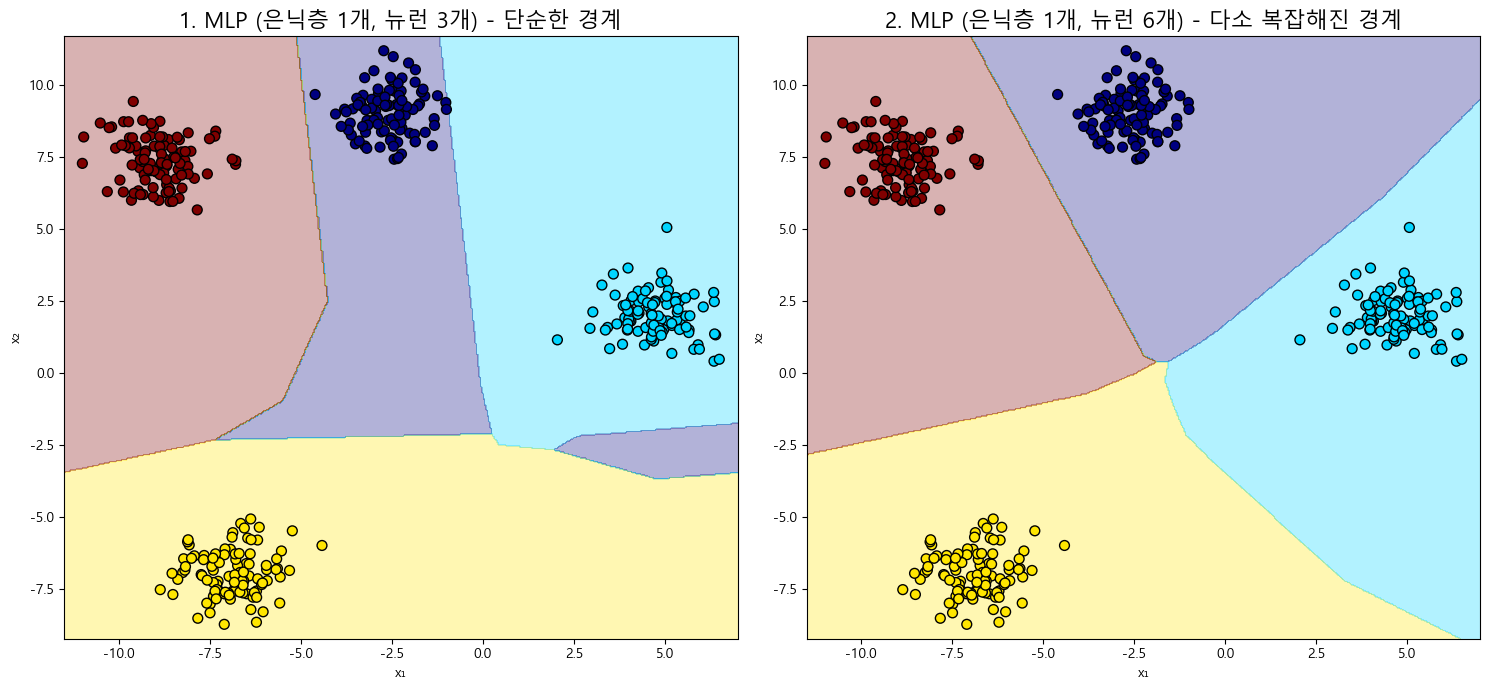

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정
# -------------------------------
# Windows 사용자
plt.rcParams['font.family'] = 'Malgun Gothic'
# macOS 사용자
# plt.rcParams['font.family'] = 'AppleGothic'
# Linux 사용자 (나눔고딕 설치 필요)
# plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
# -------------------------------

# ------------------------------------------------
# 1. 4개 클래스를 가진 데이터 생성
# ------------------------------------------------
# n_samples: 데이터 포인트 수, centers: 클래스 수 (4개), random_state 고정
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.8, random_state=42)

# ------------------------------------------------
# 2. 모델 정의 및 학습 (모두 은닉층은 1개)
# ------------------------------------------------

# 2-1. MLP 모델 (은닉층 1개, 뉴런 3개)
# 뉴런 수를 3개로 단순화
mlp_clf_3neurons = MLPClassifier(hidden_layer_sizes=(3,), # <--- 은닉층 1개, 뉴런 3개로 수정
                               activation='relu',
                               solver='adam',
                               max_iter=5000,
                               random_state=1)
mlp_clf_3neurons.fit(X, y)

# 2-2. MLP 모델 (은닉층 1개, 뉴런 6개)
# 뉴런 수를 6개로 단순화
mlp_clf_6neurons = MLPClassifier(hidden_layer_sizes=(6,), # <--- 은닉층 1개, 뉴런 6개로 수정
                               activation='relu',
                               solver='adam',
                               max_iter=5000,
                               random_state=1)
mlp_clf_6neurons.fit(X, y)


# -------------------------------
# 3. 시각화용 격자 및 예측값 계산
# -------------------------------
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# 각 모델의 예측값
Z_3neurons = mlp_clf_3neurons.predict(grid).reshape(xx.shape)
Z_6neurons = mlp_clf_6neurons.predict(grid).reshape(xx.shape)

# -------------------------------
# 4. 시각화 (두 모델 비교)
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 공통 색상 맵: 4개 클래스를 시각화할 수 있는 'jet' 사용
cmap_data = plt.cm.get_cmap('jet', 4)
cmap_boundary = plt.cm.get_cmap('jet', 4)

# (1) 은닉층 1개, 뉴런 3개 MLP
axs[0].contourf(xx, yy, Z_3neurons, alpha=0.3, cmap=cmap_boundary)
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[0].set_title("1. MLP (은닉층 1개, 뉴런 3개) - 단순한 경계", fontsize=16)

# (2) 은닉층 1개, 뉴런 6개 MLP
axs[1].contourf(xx, yy, Z_6neurons, alpha=0.3, cmap=cmap_boundary)
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[1].set_title("2. MLP (은닉층 1개, 뉴런 6개) - 다소 복잡해진 경계", fontsize=16)

for ax in axs:
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


C:\Users\dohoo\AppData\Local\Programs\Python\Python314\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\3747142110.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_data = plt.cm.get_cmap('jet', 4)
C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\3747142110.py:55: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_boundary = plt.cm.get_cmap('jet', 4)


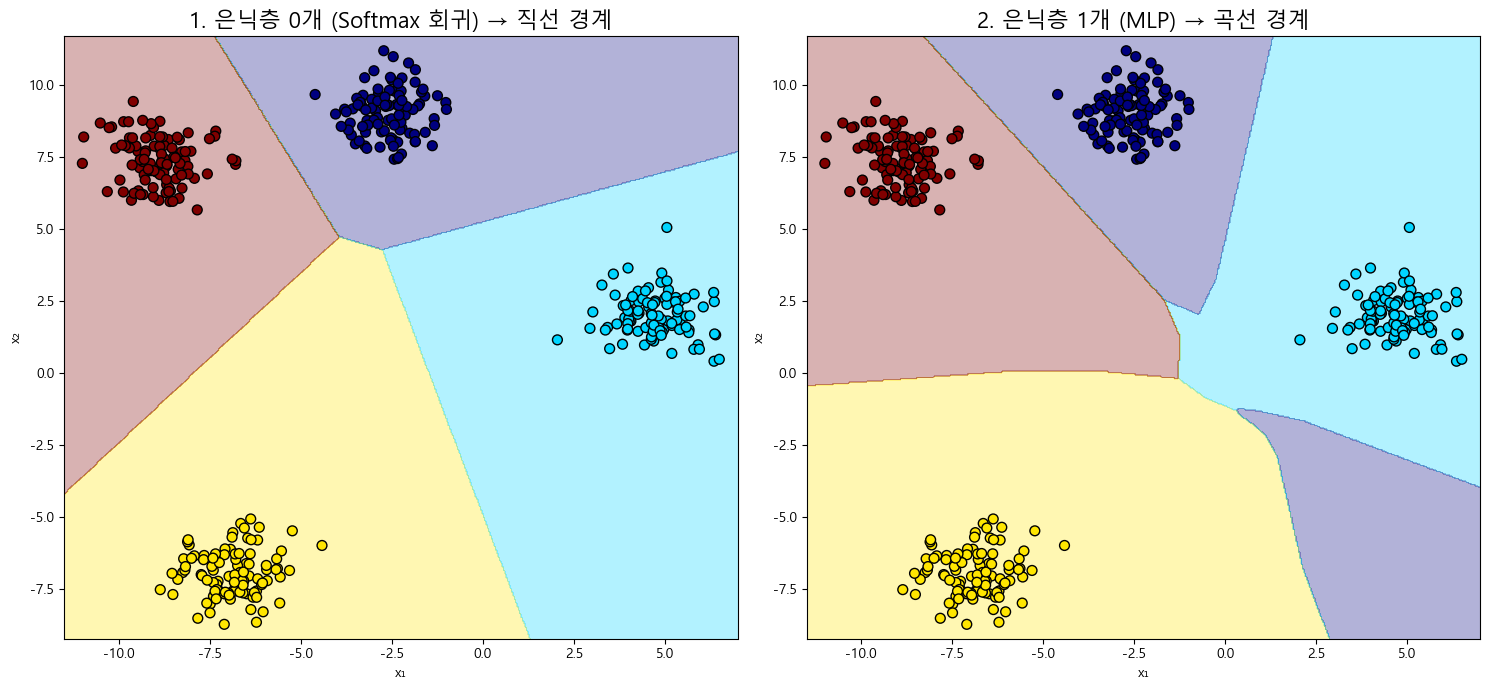

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# -------------------------------
# 한글 폰트 설정
# -------------------------------
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
# -------------------------------

# ------------------------------------------------
# 1. 4개 클래스를 가진 데이터 생성 (이전과 동일)
# ------------------------------------------------
X, y = make_blobs(n_samples=400, centers=4, cluster_std=0.8, random_state=42)

# ------------------------------------------------
# 2. 모델 정의 및 학습 (은닉층 0개: Softmax 회귀)
# ------------------------------------------------
# LogisticRegression을 다중 클래스(4개)에 적용하면 Softmax 회귀가 됩니다.
# solver='lbfgs'는 안정적인 다중 분류를 위해 선택합니다.
# max_iter를 충분히 늘려야 수렴 경고를 피할 수 있습니다.
softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000, random_state=1)
softmax_clf.fit(X, y)

# ------------------------------------------------
# 3. 비교용 MLP 모델 (은닉층 1개)
# ------------------------------------------------
# MLP는 곡선 경계가 나오는 것을 보여주기 위한 비교 대상입니다.
mlp_clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=5000, random_state=1)
mlp_clf.fit(X, y)


# -------------------------------
# 4. 시각화용 격자 및 예측값 계산
# -------------------------------
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

Z_softmax = softmax_clf.predict(grid).reshape(xx.shape)
Z_mlp = mlp_clf.predict(grid).reshape(xx.shape)

# -------------------------------
# 5. 시각화 (두 모델 비교)
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 공통 색상 맵: 4개 클래스
cmap_data = plt.cm.get_cmap('jet', 4)
cmap_boundary = plt.cm.get_cmap('jet', 4)

# (1) 은닉층 0개: Softmax 회귀
axs[0].contourf(xx, yy, Z_softmax, alpha=0.3, cmap=cmap_boundary)
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[0].set_title("1. 은닉층 0개 (Softmax 회귀) → 직선 경계", fontsize=16)

# (2) 은닉층 1개: MLP (비교)
axs[1].contourf(xx, yy, Z_mlp, alpha=0.3, cmap=cmap_boundary)
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[1].set_title("2. 은닉층 1개 (MLP) → 곡선 경계", fontsize=16)

for ax in axs:
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()


C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\1354301420.py:78: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_data = plt.cm.get_cmap('jet', 4)
C:\Users\dohoo\AppData\Local\Temp\ipykernel_2444\1354301420.py:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_boundary = plt.cm.get_cmap('jet', 4)


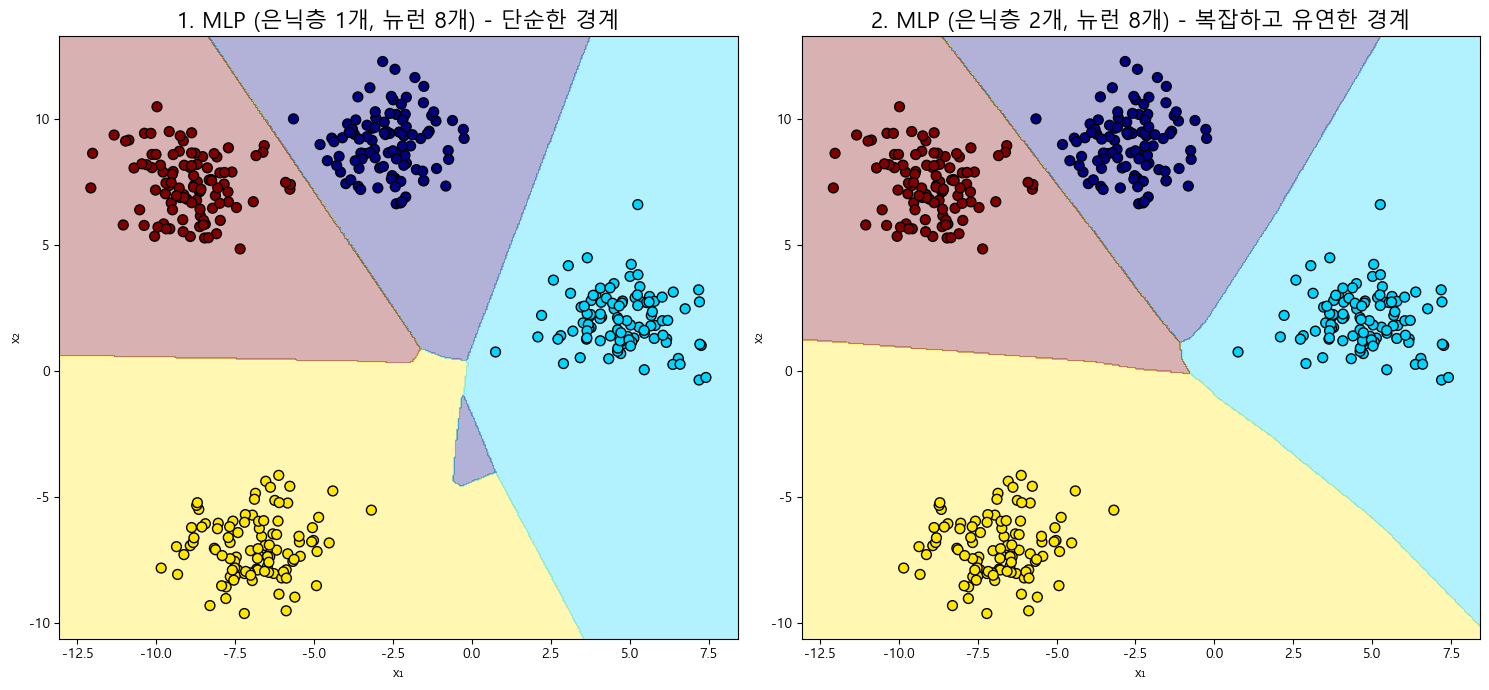

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
import warnings

# -------------------------------
# 한글 폰트 설정
# -------------------------------
try:
    # Windows 사용자
    plt.rcParams['font.family'] = 'Malgun Gothic'
except:
    try:
        # macOS 사용자
        plt.rcParams['font.family'] = 'AppleGothic'
    except:
        try:
            # Linux 사용자 (나눔고딕 설치 필요)
            plt.rcParams['font.family'] = 'NanumGothic'
        except:
            pass # 폰트 설정 실패 시 기본 폰트 사용

plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('ignore', category=UserWarning)
# -------------------------------

# ------------------------------------------------
# 1. 4개 클래스를 가진 데이터 생성
# ------------------------------------------------
# n_samples: 데이터 포인트 수 (400개), centers: 클래스 수 (4개)
# cluster_std: 분산 정도 (클수록 겹침), random_state 고정
X, y = make_blobs(n_samples=400, centers=4, cluster_std=1.2, random_state=42) # 분산(std)을 높여 경계를 더 잘 보이게 함

# ------------------------------------------------
# 2. 모델 정의 및 학습 (뉴런 6개 고정)
# ------------------------------------------------

NEURONS = 8 # 뉴런 수를 6개로 고정
RANDOM_SEED = 1 # 학습 시드 고정 (다중 클래스 문제에서 안정적인 시드)

# 2-1. MLP 모델 (은닉층 1개, 뉴런 6개)
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(NEURONS,), # (6,)
                            activation='relu',
                            solver='adam',
                            max_iter=5000,
                            random_state=RANDOM_SEED)
mlp_1_layer.fit(X, y)

# 2-2. MLP 모델 (은닉층 2개, 뉴런 6개)
mlp_2_layers = MLPClassifier(hidden_layer_sizes=(NEURONS, NEURONS), # (6, 6)
                             activation='relu',
                             solver='adam',
                             max_iter=5000,
                             random_state=RANDOM_SEED)
mlp_2_layers.fit(X, y)


# -------------------------------
# 3. 시각화용 격자 및 예측값 계산
# -------------------------------
x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                      np.linspace(y_min, y_max, 500))
grid = np.c_[xx.ravel(), yy.ravel()]

# 각 모델의 예측값
Z_1_layer = mlp_1_layer.predict(grid).reshape(xx.shape)
Z_2_layers = mlp_2_layers.predict(grid).reshape(xx.shape)

# -------------------------------
# 4. 시각화 (두 모델 비교)
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# 공통 색상 맵: 4개 클래스를 시각화할 수 있는 'jet' 사용
cmap_data = plt.cm.get_cmap('jet', 4)
cmap_boundary = plt.cm.get_cmap('jet', 4)

# (1) 은닉층 1개, 뉴런 6개 MLP
axs[0].contourf(xx, yy, Z_1_layer, alpha=0.3, cmap=cmap_boundary)
axs[0].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[0].set_title(f"1. MLP (은닉층 1개, 뉴런 {NEURONS}개) - 단순한 경계", fontsize=16)

# (2) 은닉층 2개, 뉴런 6개 MLP
axs[1].contourf(xx, yy, Z_2_layers, alpha=0.3, cmap=cmap_boundary)
axs[1].scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k', cmap=cmap_data)
axs[1].set_title(f"2. MLP (은닉층 2개, 뉴런 {NEURONS}개) - 복잡하고 유연한 경계", fontsize=16)

for ax in axs:
    ax.set_xlabel("x₁")
    ax.set_ylabel("x₂")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

plt.tight_layout()
plt.show()
